# **Task 4: Predicting Insurance Claim Amounts**


**Objective:** Estimate the medical insurance claim amount based on personal data.




In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')


In [2]:

df = pd.read_csv('/content/insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:

df.isnull().sum()


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [5]:

df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## **Visualize Distribution of Insurance Charges**

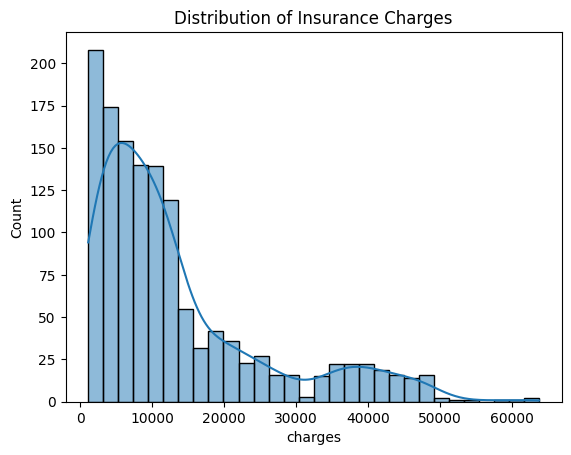

In [6]:

sns.histplot(df['charges'], kde=True)
plt.title("Distribution of Insurance Charges")
plt.show()


## **Visualize Age vs Charges**

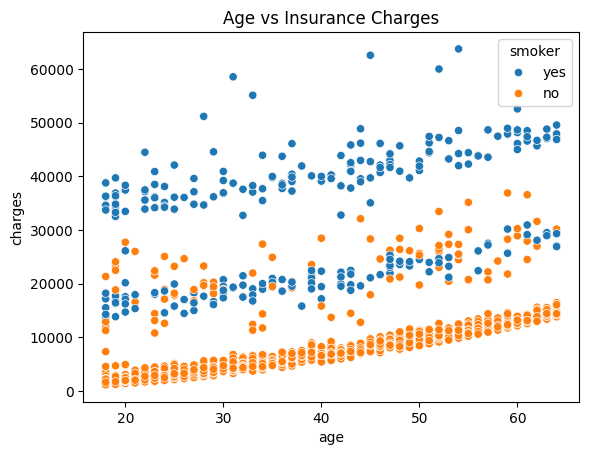

In [7]:

sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title("Age vs Insurance Charges")
plt.show()


## **visualize BMI vs Charges**

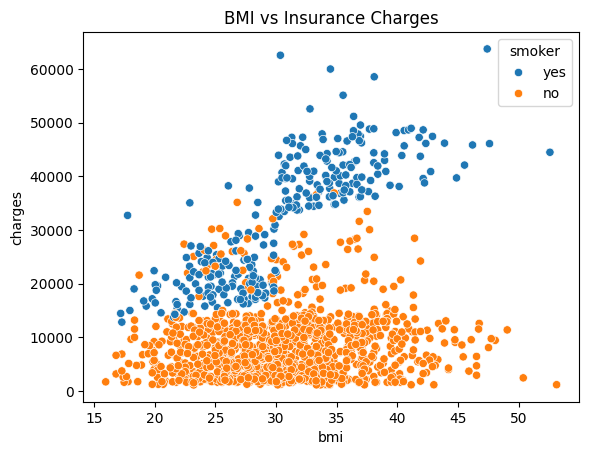

In [8]:

sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title("BMI vs Insurance Charges")
plt.show()


## : **Charges by Smoking Status**

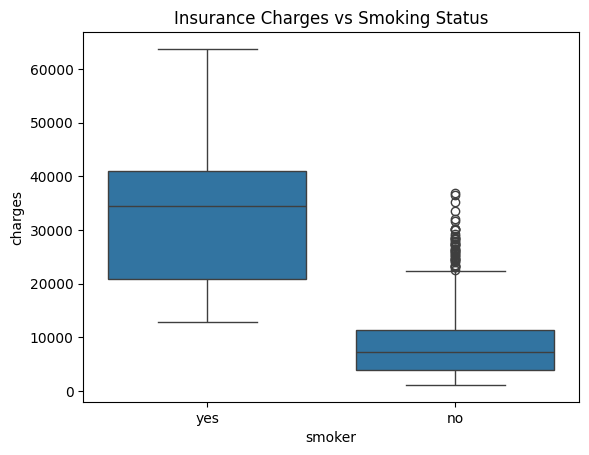

In [9]:

sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Insurance Charges vs Smoking Status")
plt.show()


## **Encode Categorical Variables**

In [14]:

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


## **Feature Correlation**

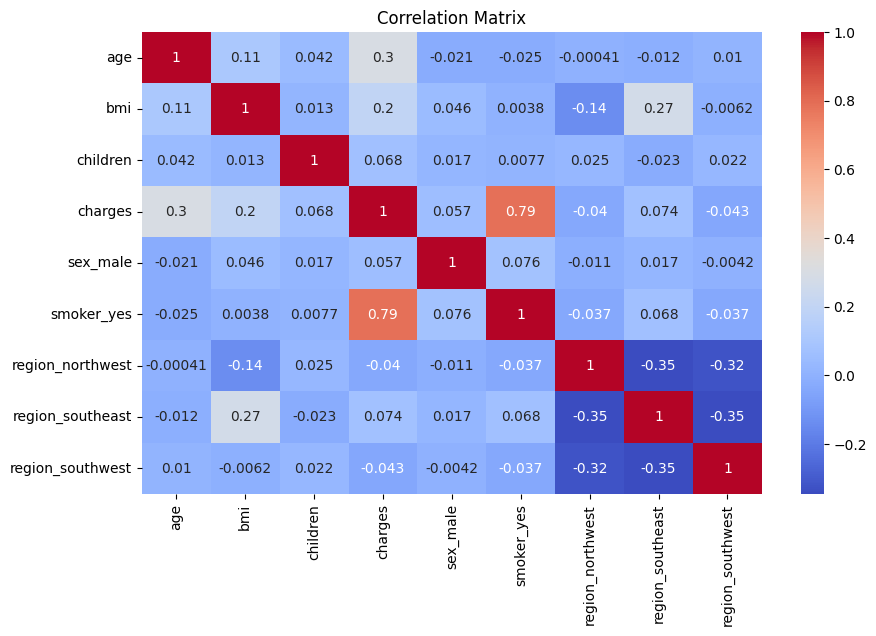

In [15]:

plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## **Define Input Features and Target Variable**

In [20]:

X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']


## **Train/Test Split**

In [21]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Train Linear Regression Model**

In [22]:

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## **Make Predictions**

In [23]:

y_pred = model.predict(X_test)


## **Calculate Mean Absolute Error (MAE)**

In [24]:

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")


Mean Absolute Error: 4181.19


## **Calculate Root Mean Squared Error (RMSE)**

In [25]:

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.2f}")


Root Mean Squared Error: 5796.28


## **Compare Actual vs Predicted Charges**

In [26]:

df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_compare.head(10)


,Actual,Predicted
764,9095.06825,8969.550274
887,5272.17580,7068.747443
890,29330.98315,36858.410912
1293,9301.89355,9454.678501
259,33750.29180,26973.173457
1312,4536.25900,10864.113164
899,2117.33885,170.280841
752,14210.53595,16903.450287
1286,3732.62510,1092.430936
707,10264.44210,11218.343184


## **Visualize Actual vs Predicted**

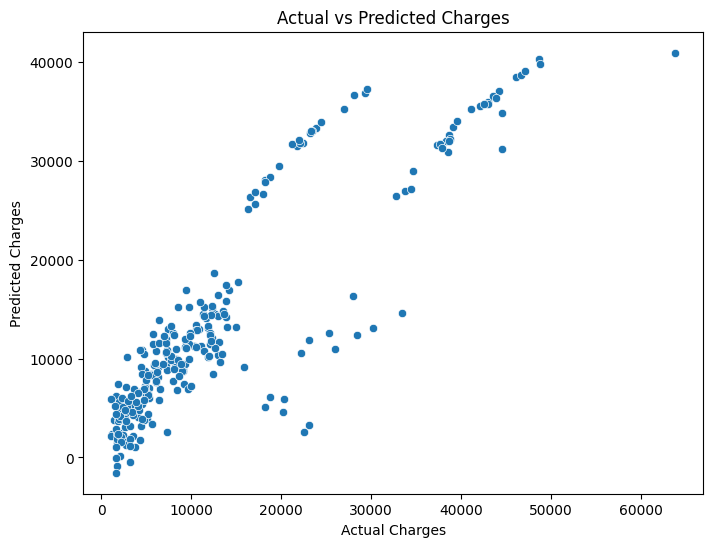

In [27]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()


## **Step 20: Summary**


- Linear Regression model trained successfully
- Strong correlation observed with **age**, **BMI**, and **smoking status**
- Model evaluation metrics calculated:
  - **MAE** and **RMSE** show good predictive capability
- Further improvements can include advanced models like Random Forest or XGBoost
